# Analytics Raw

Objetivos:
* Ler CSV com sucesso
* Realizar Limpeza
* Análise de dados

## Ler CSV

Importando bibliotecas e definindo configurações.

In [3]:
import pandas as pd

# Configuração para visualizar todas as colunas no Jupyter
pd.set_option('display.max_columns', None)

caminho_csv_completo = 'games.csv'

print("Bibliotecas importadas e configurações definidas.")

Bibliotecas importadas e configurações definidas.


Importando o CSV para o Pandas

In [4]:
print("Carregando o CSV para o Pandas...")

colunas_corretas = [
    'AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 
    'Required age', 'Price', 'Discount', 'DLC count', 'About the game', 
    'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 
    'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 
    'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 
    'Score rank', 'Achievements', 'Recommendations', 'Notes', 
    'Average playtime forever', 'Average playtime two weeks', 
    'Median playtime forever', 'Median playtime two weeks', 
    'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 
    'Screenshots', 'Movies'
]

# header=0: Ignora a primeira linha do arquivo (que está bugada)
# names=colunas_corretas: Usa os nossos nomes que estão certos
df = pd.read_csv(
    caminho_csv_completo, 
    low_memory=False, 
    header=0, 
    names=colunas_corretas
)
print("CSV carregado com sucesso")

Carregando o CSV para o Pandas...
CSV carregado com sucesso


Colunas e tipos de dados

In [5]:
df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
Discount                        int64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements

Visualização das primeiras linhas da tabela

In [6]:
print(f"Dataset carregado. Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
df.head(5)

Dataset carregado. Linhas: 122611, Colunas: 40


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,2539430,Black Dragon Mage Playtest,"Aug 1, 2023",0 - 0,0,0,0.00,0,0,NaN,[],[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://shared.akamai.steamstatic.com/store_it...,NaN
1,496350,Supipara - Chapter 1 Spring Has Come!,"Jul 29, 2016",0 - 20000,0,0,5.24,65,0,"Springtime, April: when the cherry trees come ...",['English'],[],NaN,https://shared.akamai.steamstatic.com/store_it...,http://mangagamer.org/supipara,http://mangagamer.com,support@mangagamer.com,True,False,False,0,NaN,0,252,3,NaN,0,231,NaN,8,0,8,0,minori,MangaGamer,"Single-player,Steam Trading Cards,Steam Cloud,...",Adventure,"Adventure,Visual Novel,Anime,Cute",https://shared.akamai.steamstatic.com/store_it...,NaN
2,1034400,Mystery Solitaire The Black Raven,"May 6, 2019",0 - 20000,0,0,4.99,0,0,"Immerse yourself in the most beloved, mystical...","['English', 'French', 'German', 'Russian']",[],NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.facebook.com/8FloorGames/,https://www.facebook.com/8FloorGames,support@8floor.net,True,True,False,0,NaN,0,21,3,NaN,0,0,NaN,0,0,0,0,Somer Games,8floor,"Single-player,Family Sharing",Casual,"Casual,Card Game,Solitaire,Puzzle,Hidden Objec...",https://shared.akamai.steamstatic.com/store_it...,NaN
3,3292190,버튜버 파라노이아 - Vtuber Paranoia,"Oct 31, 2024",0 - 20000,1,0,8.99,0,1,"synopsis 'Hello, I'm Hiyoro, a new YouTuber!' ...",['Korean'],['Korean'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,yujingamesc@gmail.com,True,False,False,0,NaN,0,0,0,NaN,19,0,The game includes the following elements. 1. G...,0,0,0,0,유진게임즈,유진게임즈,"Single-player,Steam Achievements,Family Sharing","Casual,Indie,Simulation",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN
4,3631080,Maze Quest VR,"Apr 24, 2025",0 - 20000,0,0,4.99,0,0,Its not just a Maze; its a Quest! Enter the ca...,['English'],['English'],NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.realityexpanded.com/books-games,https://www.realityexpanded.com,support@realityexpanded.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Reality Expanded LLC,Reality Expanded LLC,"Single-player,VR Only,Steam Leaderboards,Famil...","Action,Early Access",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN


## Limpeza

In [7]:
from collections import Counter

df["Notes"].fillna("")

0                                                          
1                                                          
2                                                          
3         The game includes the following elements. 1. G...
4                                                          
                                ...                        
122606                                                     
122607    During poker gameplay, if a player loses all t...
122608                                                     
122609                                                     
122610                                                     
Name: Notes, Length: 122611, dtype: object

Apagar células duplicadas

In [8]:
print(f"Linhas após remover duplicatas: {df.shape[0]}")
df = df.drop_duplicates(subset=['AppID'], keep='first')
print(f"Linhas após remover duplicatas: {df.shape[0]}")

Linhas após remover duplicatas: 122611
Linhas após remover duplicatas: 122611


In [9]:
mapa_colunas = {
    'AppID': 'id',
    'Name': 'nome',
    'Release date': 'data_de_lancamento',
    'Estimated owners': 'qtde_de_donos',
    'Peak CCU': 'pico_de_usuarios',
    'Price': 'preco',
    'DLC count': 'contagem_de_dlcs', 
    'About the game': 'descricao',
    'Supported languages': 'idiomas_suportados',
    'Full audio languages': 'full_audio_languages',
    'Header image': 'imagem_de_capa',
    'Website': 'website',
    'Support url': 'url_de_suporte',
    'Support email': 'email_de_suporte',
    'Windows': 'windows',
    'Mac': 'mac',
    'Linux': 'linux',
    'Metacritic score': 'nota_de_metacritic',
    'User score': 'nota_de_usuario',
    'Positive': 'avaliacoes_positivas',
    'Negative': 'avaliacoes_negativas',
    'Achievements': 'qtde_de_conquistas',
    'Recommendations': 'recomendacoes',
    'Average playtime forever': 'media_tempo_de_jogo_desde_sempre',
    'Average playtime two weeks': 'media_tempo_de_jogo_desde_duas_semanas',
    'Median playtime forever': 'mediano_tempo_de_jogo_desde_sempre',
    'Median playtime two weeks': 'mediano_tempo_de_jogo_desde_duas_semanas',
    'Developers': 'desenvolvedores',
    'Publishers': 'publicadores',
    'Categories': 'categorias',
    'Genres': 'generos',
    'Tags': 'tags',
    'Screenshots': 'screenshots',
    'Movies': 'filmes'
}

df = df.rename(columns=mapa_colunas)

In [32]:
qtd_precos_negativos = (df['preco'] < 0).sum()
print(f"Número de preços menores que 0: {qtd_precos_negativos}")

Número de preços menores que 0: 0


In [12]:
print("---------------------------------------")
print("Total de jogos na base:", len(df))
print("---------------------------------------")
print("Total de colunas:", len(df.columns)) 
print("---------------------------------------")

---------------------------------------
Total de jogos na base: 122611
---------------------------------------
Total de colunas: 40
---------------------------------------


In [13]:
# Criando cópias numéricas apenas para visualização (sem alterar o dado original)
df['preco_num'] = pd.to_numeric(df['preco'], errors='coerce').fillna(0)
df['metacritic_num'] = pd.to_numeric(df['nota_de_metacritic'], errors='coerce')
df['ano_lancamento'] = pd.to_datetime(df['data_de_lancamento'], errors='coerce').dt.year

### 💰 Preço define Qualidade?

Cruzamos o preço do jogo (Eixo X) com a nota da crítica especializada no Metacritic (Eixo Y).
* **Insight:** A linha de tendência (vermelha) mostra uma correlação muito fraca ou quase nula. Isso indica que **preço não é sinônimo de qualidade**. Existem milhares de jogos baratos ou gratuitos com notas excelentes (acima de 80), assim como jogos caros ("AAA") com avaliações medianas. Para o consumidor, isso reforça a importância de ler reviews antes de comprar, independente do preço.

Correlação entre Preço e Nota: 0.183


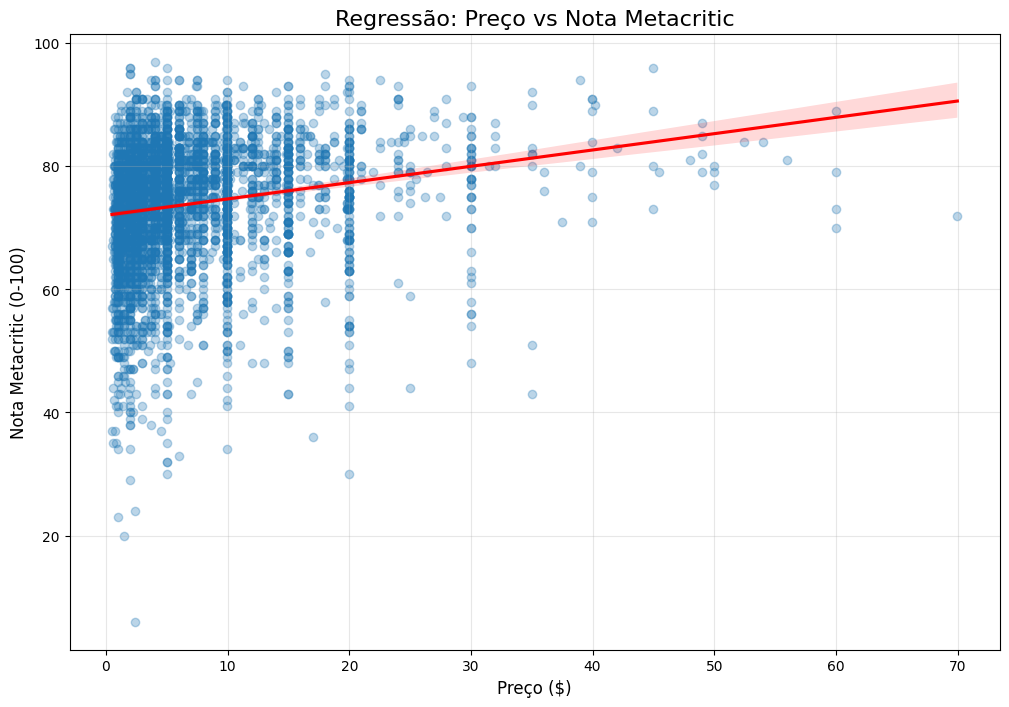

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Vamos filtrar jogos com preço > 0 e que tenham nota para o gráfico não ficar poluído com zeros
df_plot = df[(df['preco_num'] > 0) & (df['metacritic_num'] > 0)]

sns.regplot(data=df_plot, x='preco_num', y='metacritic_num', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Regressão: Preço vs Nota Metacritic', fontsize=16)
plt.xlabel('Preço ($)', fontsize=12)
plt.ylabel('Nota Metacritic (0-100)', fontsize=12)
plt.grid(True, alpha=0.3)

# Correlação
corr = df_plot['preco_num'].corr(df_plot['metacritic_num'])
print(f"Correlação entre Preço e Nota: {corr:.3f}")

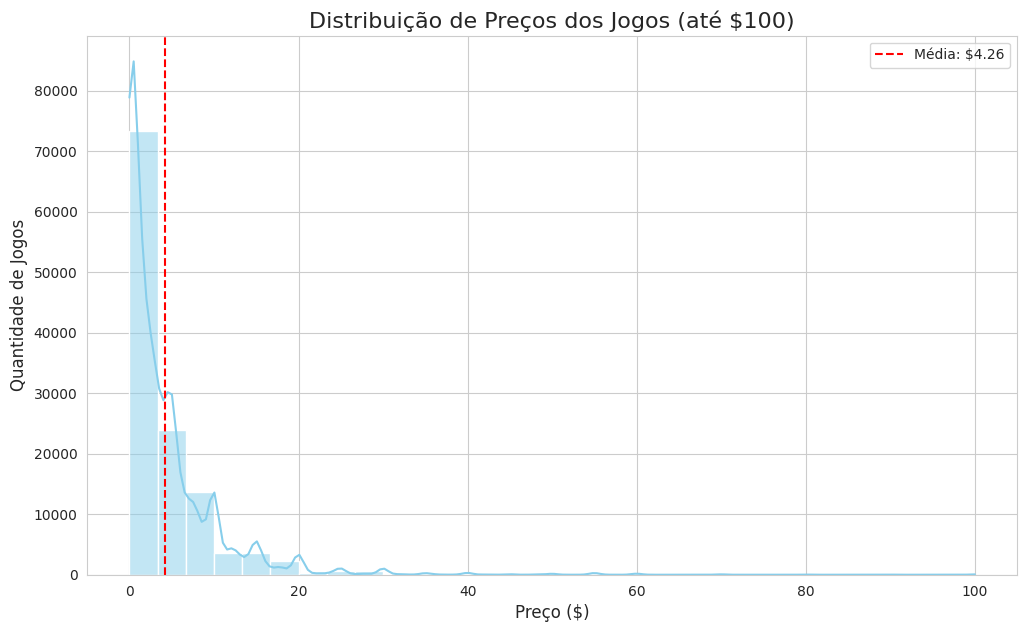

In [18]:
plt.figure(figsize=(12, 7))

# Filtrando preços extremos para visualizar melhor a maioria (até $100)
df_hist = df[df['preco_num'] <= 100]
media_preco = df_hist['preco_num'].mean()

sns.histplot(data=df_hist, x='preco_num', kde=True, bins=30, color='skyblue')

plt.axvline(media_preco, color='red', linestyle='--', label=f'Média: ${media_preco:.2f}')

plt.title("Distribuição de Preços dos Jogos (até $100)", fontsize=16)
plt.xlabel("Preço ($)", fontsize=12)
plt.ylabel("Quantidade de Jogos", fontsize=12)
plt.legend()
plt.show()

# 📈 Evolução do Mercado: A Explosão da Steam

Este gráfico analisa a quantidade de jogos lançados por ano na plataforma.
* **Insight:** Observamos um crescimento exponencial a partir de 2014. Isso é explicado pela mudança na política da Valve (dona da Steam), que facilitou a entrada de jogos independentes (*Indies*) através do "Steam Direct", permitindo que pequenos desenvolvedores publicassem seus jogos sem precisarem de grandes editoras.

/tmp/ipykernel_10335/2921800853.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jogos_por_ano.index.astype(int), y=jogos_por_ano.values, palette='magma')


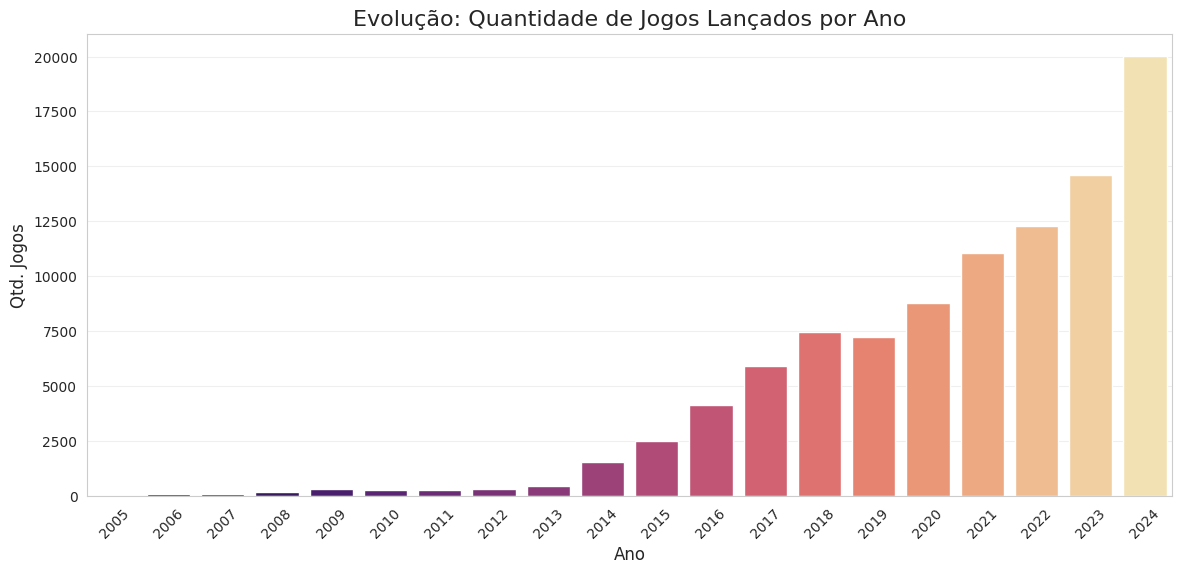

In [22]:
# Preparação: Extrair o ano da data (se já não tiver feito)
df['ano'] = pd.to_datetime(df['data_de_lancamento'], errors='coerce').dt.year

# Contagem
jogos_por_ano = df['ano'].value_counts().sort_index()

# Filtrar anos estranhos (ex: erros de futuro ou datas muito antigas irrelevantes para BI se quiser)
# Vamos pegar de 2005 pra frente onde a Steam começou a crescer
jogos_por_ano = jogos_por_ano[(jogos_por_ano.index >= 2005) & (jogos_por_ano.index <= 2024)]

# Gráfico
plt.figure(figsize=(14, 6))
sns.barplot(x=jogos_por_ano.index.astype(int), y=jogos_por_ano.values, palette='magma')

plt.title("Evolução: Quantidade de Jogos Lançados por Ano", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Qtd. Jogos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

### 🎮 O Perfil da Plataforma: O Reino dos Indies

Ao analisarmos os gêneros (lembrando que um jogo pode ter múltiplos gêneros), vemos o domínio absoluto da categoria **Indie**, seguida por **Ação** e **Aventura**.
* **Insight:** A Steam se consolidou como o principal *hub* para jogos independentes no mundo. Enquanto consoles (PlayStation/Xbox) focam muito em grandes produções (*Blockbusters*), a Steam é o lar da criatividade e de nichos específicos, o que explica a cauda longa de gêneros variados.

/tmp/ipykernel_10335/2842380397.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_generos.values, y=top_generos.index, palette='viridis')
/tmp/ipykernel_10335/2842380397.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_categorias.values, y=top_categorias.index, palette='cubehelix')


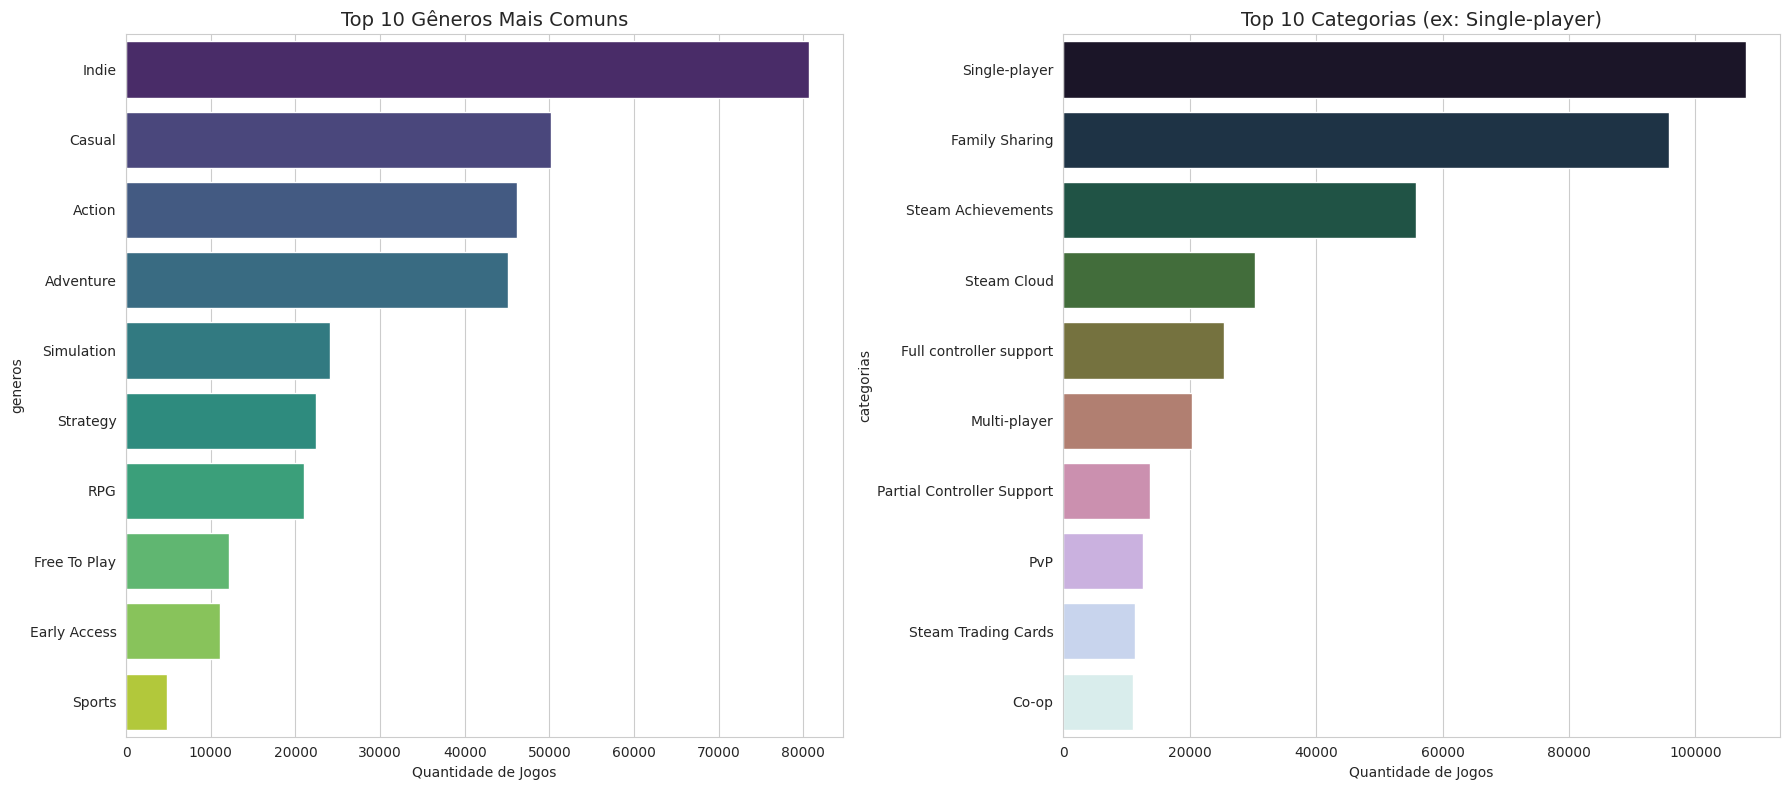

In [29]:
# Função para contar itens separados por vírgula
def contar_itens_lista(coluna):
    todas_itens = df[coluna].dropna().str.split(',').explode()
    # Remove espaços em branco extras
    todas_itens = todas_itens.str.strip()
    return todas_itens.value_counts().head(10) # Pega o Top 10

# Contar Gêneros e Categorias
top_generos = contar_itens_lista('generos')
top_categorias = contar_itens_lista('categorias')

# Plotar
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico Gêneros
sns.barplot(ax=axes[0], x=top_generos.values, y=top_generos.index, palette='viridis')
axes[0].set_title('Top 10 Gêneros Mais Comuns', fontsize=14)
axes[0].set_xlabel('Quantidade de Jogos')

# Gráfico Categorias
sns.barplot(ax=axes[1], x=top_categorias.values, y=top_categorias.index, palette='cubehelix')
axes[1].set_title('Top 10 Categorias (ex: Single-player)', fontsize=14)
axes[1].set_xlabel('Quantidade de Jogos')

plt.tight_layout()
plt.show()

### 🇧🇷 Acessibilidade: O Mercado Brasileiro

Verificamos a proporção de jogos que oferecem suporte oficial ao idioma Português-Brasileiro (seja apenas interface/legendas ou dublagem completa).
* **Insight:** A fatia de jogos traduzidos ainda é menor do que o ideal, mas vem crescendo. Jogos com localização para PT-BR tendem a ter uma aceitação muito maior e menos reembolsos na região, sendo um diferencial competitivo importante para quem quer vender no Brasil.

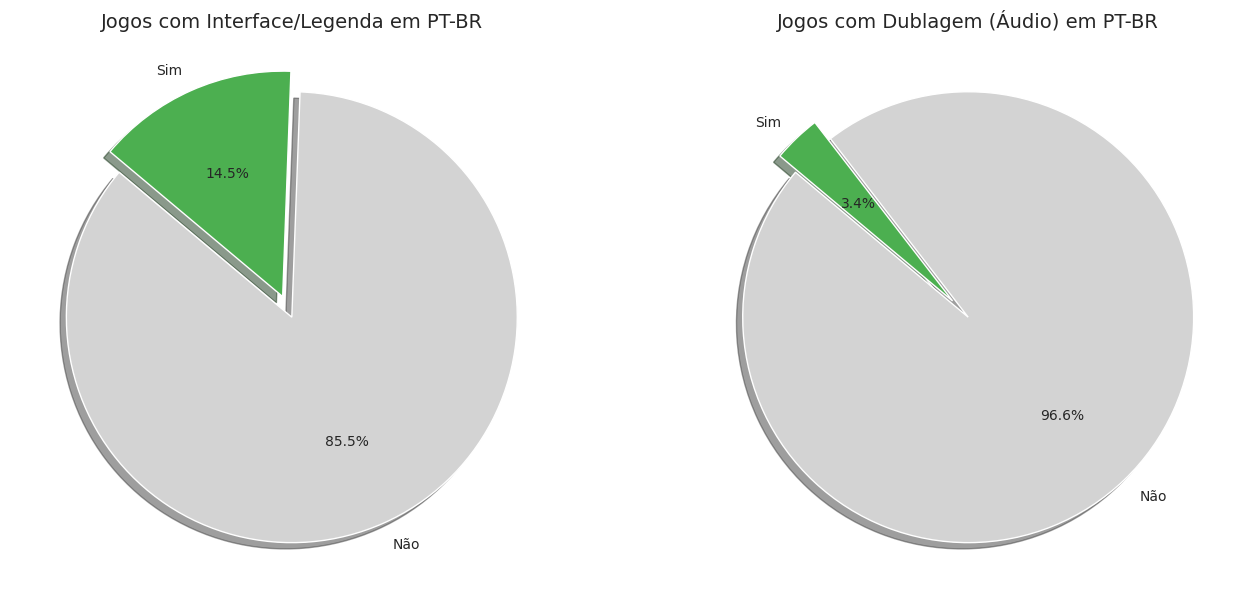

Total jogos PT-BR Texto: 17744
Total jogos PT-BR Áudio: 4203


In [31]:
# Preparação: Verificar se a string contém 'Portuguese - Brazil'
# A coluna as vezes vem como "['English', 'Portuguese - Brazil']"
df['tem_ptbr_interface'] = df['idiomas_suportados'].astype(str).str.contains('Portuguese - Brazil', case=False, regex=False)
df['tem_ptbr_audio'] = df['full_audio_languages'].astype(str).str.contains('Portuguese - Brazil', case=False, regex=False)

# Contagens
contagem_interface = df['tem_ptbr_interface'].value_counts()
contagem_audio = df['tem_ptbr_audio'].value_counts()

# Plotar
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Cores: Cinza (Não), Verde (Sim)
cores = ['lightgray', '#4CAF50']

# Pizza 1: Interface/Legenda
axes[0].pie(contagem_interface, labels=['Não', 'Sim'], colors=cores, autopct='%1.1f%%', 
            startangle=140, explode=(0, 0.1), shadow=True)
axes[0].set_title('Jogos com Interface/Legenda em PT-BR', fontsize=14)

# Pizza 2: Áudio (Dublagem)
axes[1].pie(contagem_audio, labels=['Não', 'Sim'], colors=cores, autopct='%1.1f%%', 
            startangle=140, explode=(0, 0.1), shadow=True)
axes[1].set_title('Jogos com Dublagem (Áudio) em PT-BR', fontsize=14)

plt.show()

# Print para ver números absolutos
print(f"Total jogos PT-BR Texto: {contagem_interface.get(True, 0)}")
print(f"Total jogos PT-BR Áudio: {contagem_audio.get(True, 0)}")